In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

In [2]:
df_combined=pd.read_csv('https://raw.githubusercontent.com/zhaoz127/haha/refs/heads/main/train.csv' , sep=";")


In [3]:
df_combined.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Part1: EDA 

### Quantity exploration

In [5]:
df_combined.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


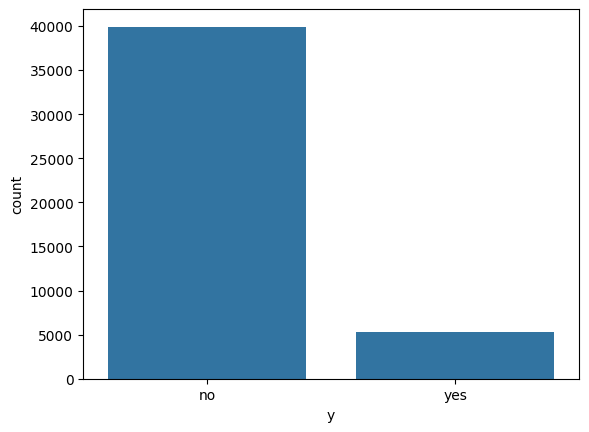

In [6]:

sns.countplot(df_combined , x = "y")
plt.xticks
plt.show()

Insight: The majority of customers in the data are classified as' no ', meaning that the majority of customers have no deposit in here.

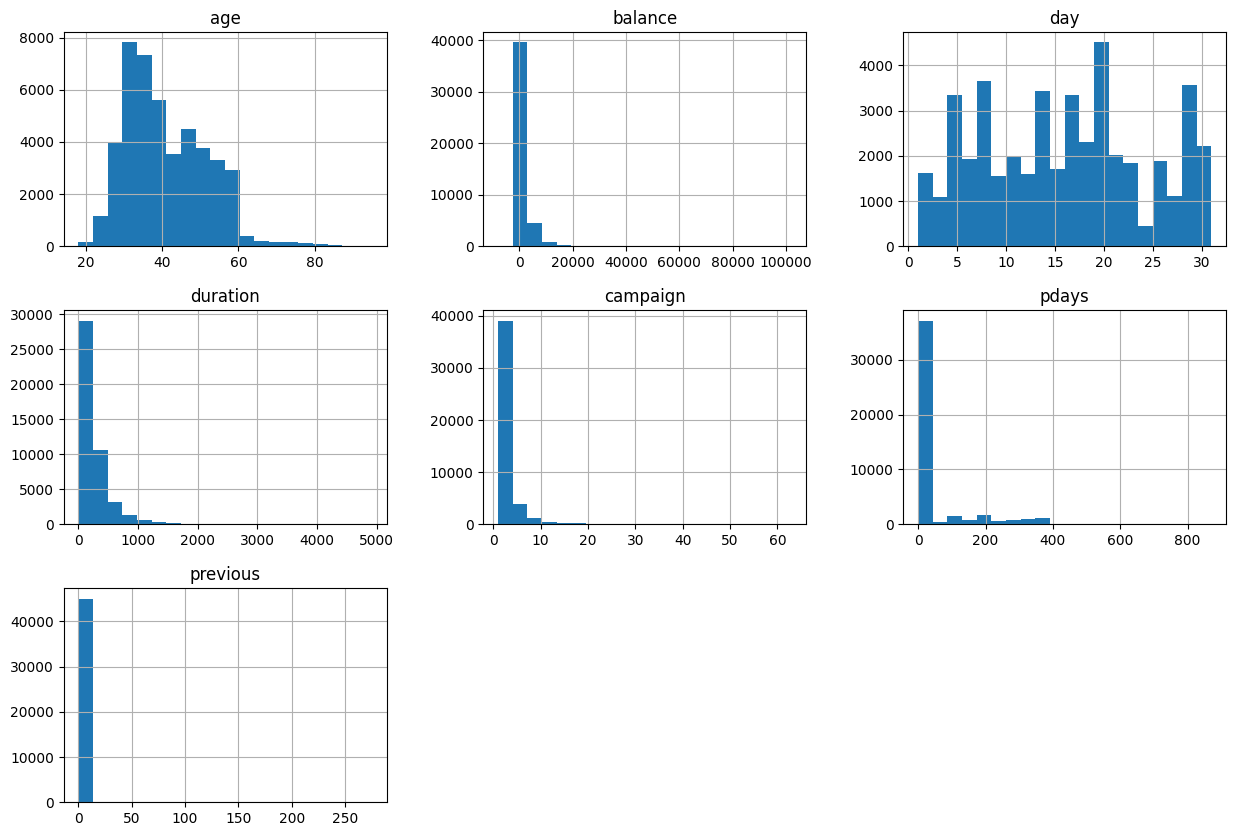

In [7]:
df_combined.hist(bins=20, figsize=(15, 10))
plt.show()

① Most customers are concentrated between the ages of 30 and 60, with a slightly younger distribution and fewer people over 60 years old.

② Most customers have a balance close to zero, and a very small number of customers have a particularly high balance, which means may require outlier cleaning steps.

③ The number of customer contacts is relatively uniform across different days

④ The distribution of call duration is significantly skewed to the right, with most calls lasting less than 1000 seconds, which may be an important factor affecting customer behavior.

⑤ Most customers only participated in a few of marketing activities (less than 10 times)。.

⑥ Most customers have 0 Pdays means that these customers have either never been contacted.

⑦ The previous distribution is highly concentrated in the 0 region, indicating that most customers have not participated in marketing activities before or have had very few occurrences.

In [8]:
df_combined['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

### Relationship with y

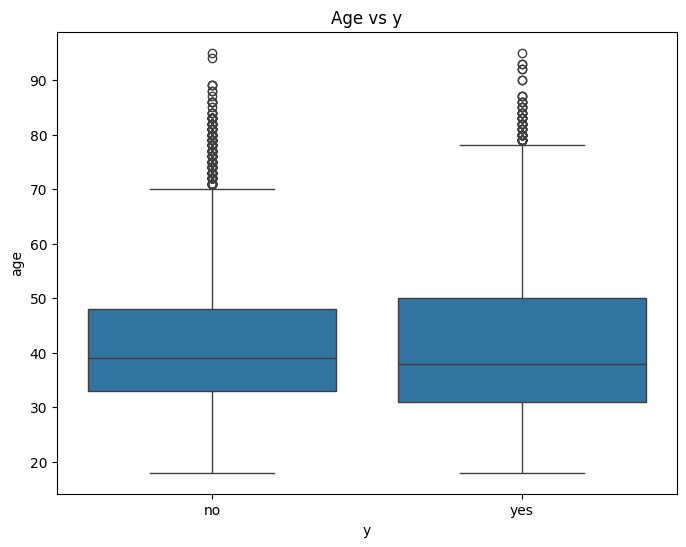

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='age', data=df_combined)
plt.title('Age vs y')
plt.show()

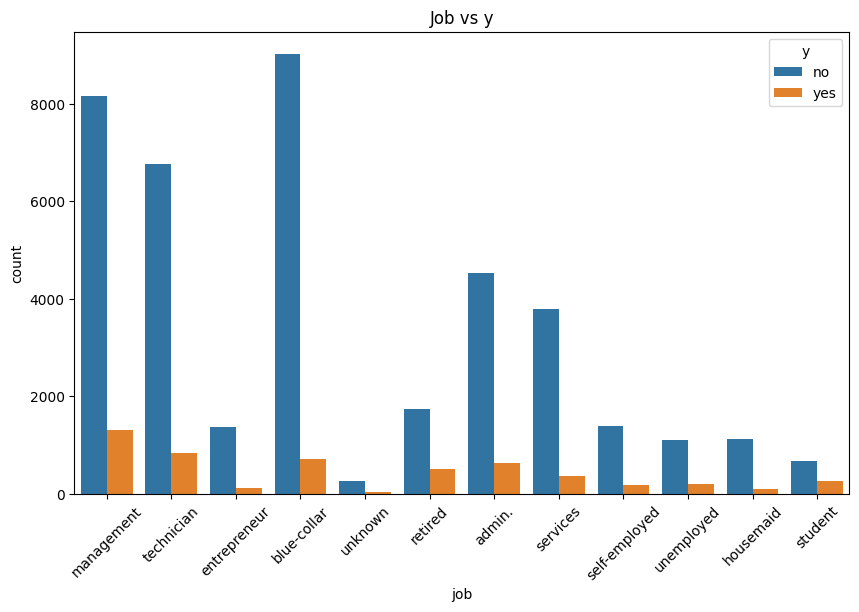

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='y', data=df_combined)
plt.title('Job vs y')
plt.xticks(rotation=45)
plt.show()

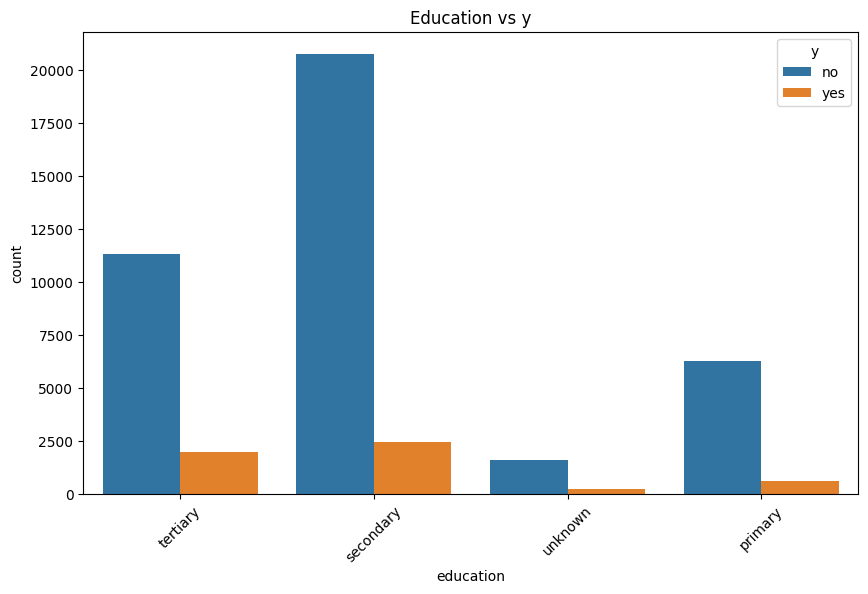

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=df_combined)
plt.title('Education vs y')
plt.xticks(rotation=45)
plt.show()

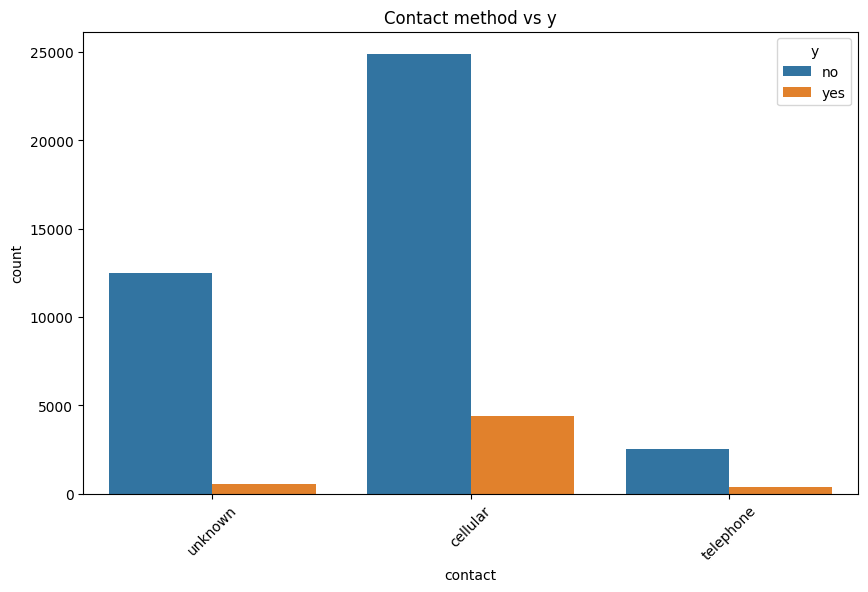

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='contact', hue='y', data=df_combined)
plt.title('Contact method vs y')
plt.xticks(rotation=45)
plt.show()

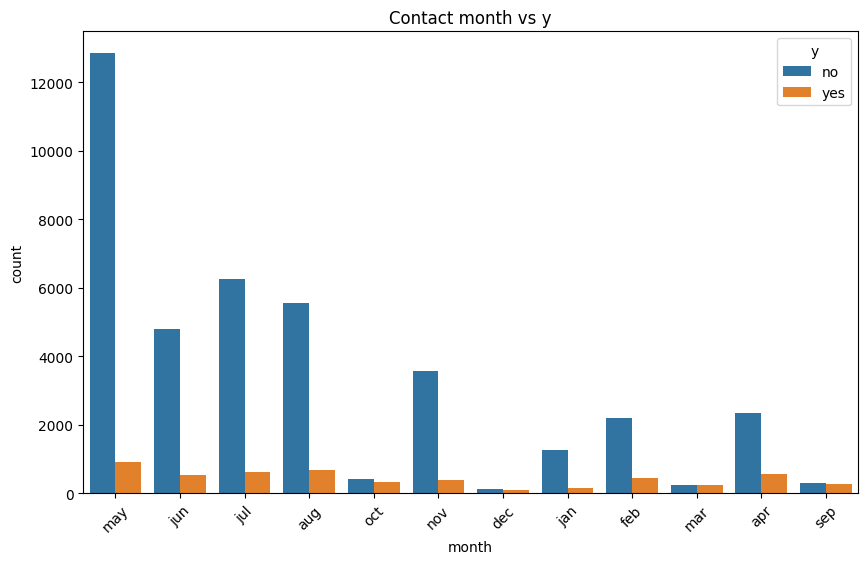

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='y', data=df_combined)
plt.title('Contact month vs y')
plt.xticks(rotation=45)
plt.show()

① The relationship between job and y

The difference in the number of customers with deposits among different professions is not significant. The proportion of customers from management and technical personnel in the yes category is relatively high, while the proportion of entrepreneurs is relatively low.

② The relationship between education and y

Customers with tertiary education are more likely to have the deposits than those with other levels of education

③ The relationship between the contant method and y

There is no clear management between contact information and y. Although the figure shows that there are more customers with deposits using cellular (mobile phone) contact, it is due to the large number of people using this contact method.

④ The relationship between contact month and y

The month of customer contact is not particularly related to the results. The number of customers contacted in May was the highest, however, the proportion of customers who have deposits was relatively low.

## Data Clean


In [14]:
df_combined.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

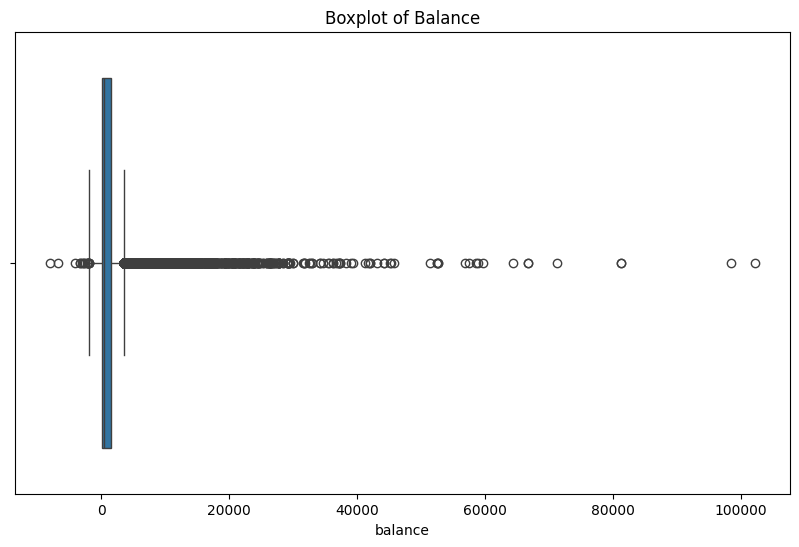

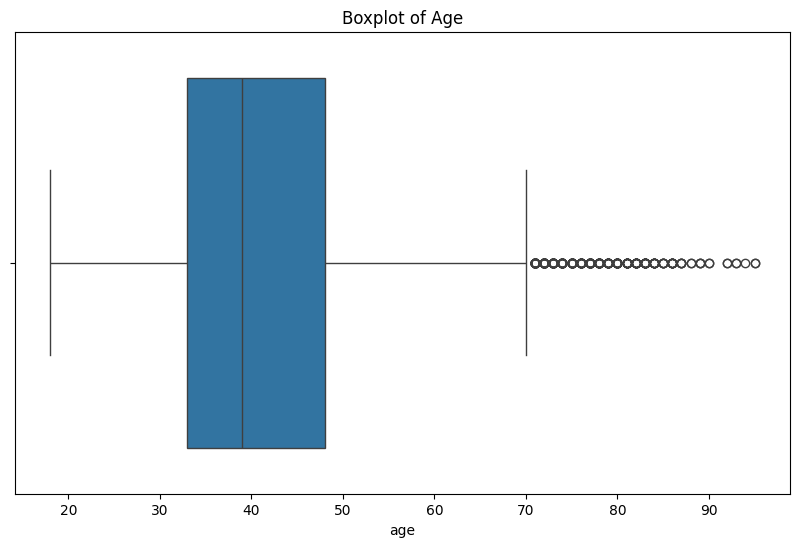

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_combined['balance'])
plt.title('Boxplot of Balance')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_combined['age'])
plt.title('Boxplot of Age')
plt.show()

##### Data Winsorization
We observe a notable number of outliers under the column age and balance, indicating that the range for these two and the extreme values can skew the data. For balance, due to its nature, using IQR for boundaries might not be enough as the extreme values drive the quantiles. It's clear from the boxplot, the boxplot is very skew to the right. Therefore, we used 99% quantitle to winsorize the outliers. After winsorization, the boxplot is nearly not skewed.

For age, the original boxplot is slightly skewed to the right, therefore using IQR is used in this case for creating the upper and lower boundaries. The lower boxplot also shows the data after winsorization, it looks much more equal than before.

In [16]:
upper_bound = df_combined['balance'].quantile(0.99)
df_combined['balance'] = df_combined['balance'].clip(upper=upper_bound)

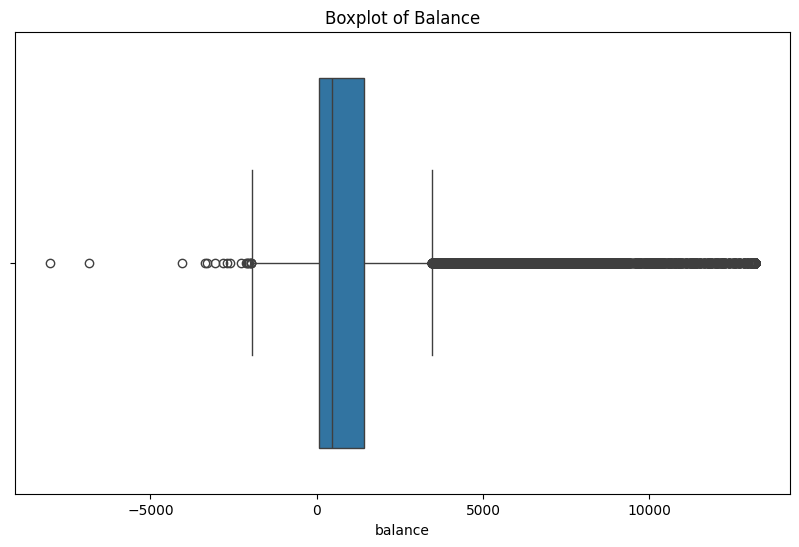

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_combined['balance'])
plt.title('Boxplot of Balance')
plt.show()

In [18]:
Q1 = df_combined['age'].quantile(0.25)
Q3 = df_combined['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_combined['age'] = df_combined['age'].clip(lower=lower_bound, upper=upper_bound)


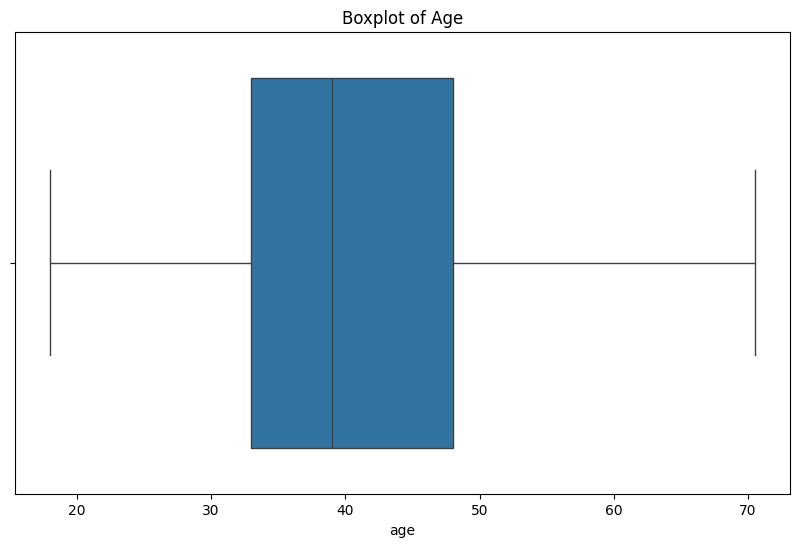

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_combined['age'])
plt.title('Boxplot of Age')
plt.show()

In [20]:
cat_feature=[feature for feature in df_combined.columns if df_combined[feature].dtypes=='object']
cat_feature
for feature in cat_feature:
    print(feature, len(df_combined[feature].unique()))

job 12
marital 3
education 4
default 2
housing 2
loan 2
contact 3
month 12
poutcome 4
y 2


In [21]:
df_combined['y'] = df_combined['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [22]:
df_combined['marital'] = df_combined['marital'].apply(lambda x: 1 if x == 'married' else 0)
df_combined['education'] = df_combined['education'].apply(lambda x: 1 if x == 'secondary' else 0)
df_combined['default'] = df_combined['default'].apply(lambda x: 1 if x == 'yes' else 0)
df_combined['housing'] = df_combined['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df_combined['loan'] = df_combined['loan'].apply(lambda x: 1 if x == 'yes' else 0)
df_combined['contact'] = df_combined['contact'].apply(lambda x: 1 if x == 'cellular' else 0)
df_combined['month'] = df_combined['month'].apply(lambda x: 1 if x == 'may' else 0)
df_combined['poutcome'] = df_combined['poutcome'].apply(lambda x: 1 if x == 'successful' else 0)


In [23]:
print(df_combined)

        age           job  marital  education  default  balance  housing  \
0      58.0    management        1          0        0   2143.0        1   
1      44.0    technician        0          1        0     29.0        1   
2      33.0  entrepreneur        1          1        0      2.0        1   
3      47.0   blue-collar        1          0        0   1506.0        1   
4      33.0       unknown        0          0        0      1.0        0   
...     ...           ...      ...        ...      ...      ...      ...   
45206  51.0    technician        1          0        0    825.0        0   
45207  70.5       retired        0          0        0   1729.0        0   
45208  70.5       retired        1          1        0   5715.0        0   
45209  57.0   blue-collar        1          1        0    668.0        0   
45210  37.0  entrepreneur        1          1        0   2971.0        0   

       loan  contact  day  month  duration  campaign  pdays  previous  \
0         0   

In [24]:
x = df_combined.drop(['y', 'job', 'day', 'pdays', 'previous', 'default', 'month', 'contact', 'balance'], axis=1)
y = df_combined['y']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
scaling_pipeline = Pipeline([
    ('scaler', StandardScaler())])

scaling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler())])

##### Feature Engineering
For the categorical variables in the dataset, One Hot Encoding is applied to get binary outcomes for the columns, which can be easily used in the models. Another Standard Scaler pipeline is also created to center the data and scale to unit variance.

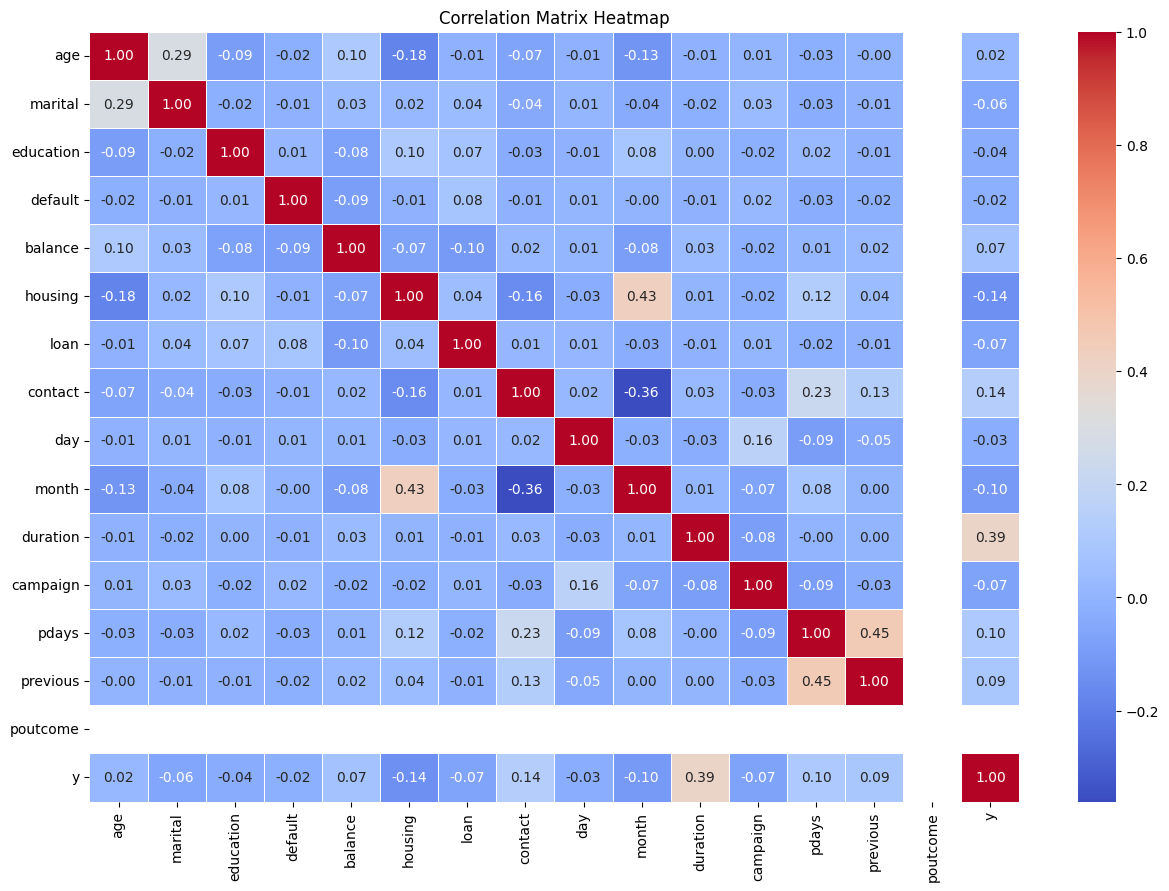

In [26]:
df_numeric = df_combined.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


The heatmap shows the correlations between each variables and from the last row we observe several meaningful variables that can be include in the estimator. For example, the variable duration's coefficient appears to be 0.39, which means it has a moderate positive correlation between y and duration. The variable housing also shows a slight positive correlation as well, which can also be considered when building the model.

### Data balance


In [27]:
df_combined['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

## Part2: Build Baseline Models

In [28]:
print(df_combined.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [29]:
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=10000)

knn_scores = cross_val_score(knn, X_train, y_train, scoring= 'f1', cv=5)
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='f1', cv=5)

print(f'Logistic Regression Mean F1 Score: {np.mean(logreg_scores)}')
print(f'K-Nearest Neighbors Mean F1 Score: {np.mean(knn_scores)}')

Logistic Regression Mean F1 Score: 0.2718274152334498
K-Nearest Neighbors Mean F1 Score: 0.32555618095262007


### Logistic Regression

In [30]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
class_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8860997456596262
Confusion Matrix:
[[7813  139]
 [ 891  200]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.18      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### 

##### Performance Comparison
The initial performance of the logistic regression model was generally good, with an accuracy of approximately 89%. However, it performs poorly in predicting for the positive class (customers who pur deposits), especially with a meager recall rate of 19% and F1 score of 28%, possibly due to data imbalance. However, the computational complexity of Logistic Regression is relatively low, and the training and prediction time of the model are both less than 1 second. Therefore, it is excellent for handling large-scale datasets with minimal time overhead.


### KNN Classifer

In [31]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8741568063695676
Confusion Matrix:
[[7638  314]
 [ 824  267]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.18      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



##### Performance Comparison
The overall performance of the K-NN model is slightly better than logistic regression, with an accuracy of 87%. However, similar issues arise due to imbalanced data, with recall and F1 scores for minority classes being identical at 19% and 28%. Similar to logistic regression, it indicates that there are also shortcomings in handling imbalanced data. Although KNN's prediction time was also completed in less than 1 second, the model has a high computational complexity, especially in the prediction stage, where the distance between each test sample and the training sample needs to be calculated. Therefore, as the data size increases, the time overhead will also significantly increase.


## Part3: Ensemble Modelling

### Random Forest

In [32]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],      
    'max_depth': [5, 10, 20, None],       
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}

grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

best_rf_clf = grid_search_rf.best_estimator_

y_pred_rf = best_rf_clf.predict(X_val)

accuracy_rf = accuracy_score(y_val, y_pred_rf)

print(f"Best hyperparameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Validation Accuracy: {accuracy_rf:.2f}")
print("Classification Report for Random Forest:")
print(classification_report(y_val, y_pred_rf))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_val, y_pred_rf))

Best hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Validation Accuracy: 0.89
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.57      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043

Confusion Matrix for Random Forest:
[[7773  179]
 [ 851  240]]


##### Performance Comparison
The random forest model's running time is relatively long, about 23 minutes. This longer time consumption may be because random forests are ensemble methods that require training multiple decision trees and summarizing their results. The model's performance after optimization is good, with a validation accuracy of 89%.
Specifically, for most classes (class 0), the model performs very well with an accuracy of 90%, a recall rate of 98%, and an F1 score of up to 94%. This indicates that the model can accurately identify customers who have not deposited and rarely misclassify the majority of customers as a minority. However, the prediction performance of class 1 is relatively weak, with an accuracy of 57%, a recall of 22%, and an F1 score of 32%. This model still has significant differences in predicting the majority and minority of customers, but this result data has been more balanced than the performance of other models.

Overall, the optimized random forest model has found a better balance between accuracy and recall, especially with some improvement in minority class recognition. However, the longer running time of the model reflects the challenge of computational complexity in random forests, especially when using grid search for hyperparameter tuning, which significantly increases computation time.


##### Interpretation and Justification
Class Imbalance: Random Forest handles class imbalance relatively well due to its ensemble nature, but without specific adjustments like class weights, it may still favor the majority class. This is because each tree in the forest votes independently, and the majority class could dominate the final prediction.

Deep Decision Trees: Random Forest typically builds deep decision trees, which can capture complex patterns in the data. However, deep trees may lead to overfitting without careful tuning, especially on smaller datasets. In this case, tuning the maximum depth of trees helped balance the model's ability to generalize.

Hyperparameter Sensitivity: Random Forest is sensitive to the number and depth of trees. Tuning these parameters improves the model's performance by controlling overfitting and ensuring better generalization. Bootstrap sampling also helps reduce variance and improve stability.
The results after tuning were as expected for Random Forest, which is robust across various datasets, including imbalanced ones. The tuning helped optimize the balance between precision and recall, mainly by adjusting the number of trees and the depth of the trees, making it more resilient to overfitting and underfitting. The improvement in the model’s AUC and recall for the minority class indicates that the tuning process enhanced its ability to detect minority cases while maintaining high accuracy.

### AdaBoost

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_learner = DecisionTreeClassifier(max_depth=1, class_weight='balanced')
ada_model = AdaBoostClassifier(estimator=base_learner, n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_ada)
conf_matrix = confusion_matrix(y_test, y_pred_ada)
class_report = classification_report(y_test, y_pred_ada)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.772420656861661
Confusion Matrix:
[[6132 1820]
 [ 238  853]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      7952
           1       0.32      0.78      0.45      1091

    accuracy                           0.77      9043
   macro avg       0.64      0.78      0.65      9043
weighted avg       0.88      0.77      0.81      9043



In [34]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': np.arange(50, 200, 10),  
    'learning_rate': np.linspace(0.01, 2.0, 10), 
    'estimator__max_depth': np.arange(1, 6) 
}
random_search = RandomizedSearchCV(estimator=ada_model, param_distributions=param_dist,
                                   n_iter=50, cv=3, random_state=42, scoring='accuracy')

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_prob = best_model.predict_proba(X_test)[:, 1]

threshold = 0.65
y_pred_threshold = (y_prob >= threshold).astype(int)
y_pred = best_model.predict(X_test)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      7952
           1       0.31      0.53      0.39      1091

    accuracy                           0.80      9043
   macro avg       0.62      0.68      0.63      9043
weighted avg       0.85      0.80      0.82      9043

Best parameters found:  {'n_estimators': 180, 'learning_rate': 1.1155555555555556, 'estimator__max_depth': 5}
Best cross-validation score: 0.82


##### Performance Comparison
The AdaBoost model runs relatively fast, completing in approximately 2.7 seconds. This is a reasonably short time, considering that AdaBoost is an ensemble method which iteratively trains multiple weak learners. The model's initial performance before hyperparameter tuning was decent, with an accuracy of 77% and a significant imbalance in performance between predicting the positive and negative customers. Specifically, precision for the positive class was low at 32%, while recall was high at 78%. Although the initial model could detect the negative class well, it struggled with precision, meaning it misclassified many customers who had not put deposit instances as customers who put deposit, which led to a lower F1 score for the positive class.

After performing a random search for hyperparameter tuning, the model's performance improved considerably, with an accuracy of 80% and a more balanced performance across both classes compared with the oroginal model. While the precision for class 1 dropped to 31%, and recall jumped to 54%, leading to a even lower F1 score of 0.39. This suggests the model still misses the ability to correctly identify class 1(customers who put deposits) mainly due to data imbalance. The overall weighted avg doesn't show a considerable improvement as well. Despite the performance shows no notable improvement, the time to run the model with random search increased significantly to more than 4 minutes. This is a considerable jump in computation time, primarily because random search exhaustively evaluates multiple hyperparameter combinations using cross-validation, substantially increasing the number of model evaluations.

##### Interpretation and Justification
Class Imbalance: The dataset likely has a significant imbalance between positive and negative classes. AdaBoost’s focus on misclassified examples initially boosted the recall of positive courses, but without hyperparameter tuning, it struggled with precision. This is typical for imbalanced data, where the model have a notable false positive rate.

Shallow Decision Trees: The base learner for AdaBoost is typically a shallow decision tree (stump), which is a weak learner. These trees do not overfit easily, making them ideal for AdaBoost, but they need enough iterations to improve the model’s performance gradually. 

Hyperparameter Sensitivity: AdaBoost is known to be sensitive to its hyperparameters, particularly the learning rate and number of estimators. In this case, the hypertuning doesn't seem to do much to help to the model.
AdaBoost's results after tuning are expected as AdaBoost tends to perform well on datasets with class imbalance, especially in this case where the dataset is indeed imbalanced. Setting a threshold value also helps the model to better distinguish between the two classess, as the default(0.5) might not be helpful in seperating the classess. The main reason why hypertuning does little might still trace back to the original data imbalance isses which gives class 1 too much weight to dominant the model, even after applying class weight.


### Bagging Classifier

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'), random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100],
    'estimator__max_depth': [3, 5, 10],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False]
}

grid_search_bagging = GridSearchCV(bagging_clf, param_grid, cv=5, scoring='accuracy')
grid_search_bagging.fit(x, y)

best_bagging_clf = grid_search_bagging.best_estimator_
y_pred_bagging = best_bagging_clf.predict(X_val)
accuracy_bagging = accuracy_score(y_val, y_pred_bagging)

print(f"Best parameters for Bagging Classifier: {grid_search_bagging.best_params_}")
print(f"Accuracy: {accuracy_bagging:.2f}")

print("Classification Report:")
print(classification_report(y_val, y_pred_bagging))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_bagging))


Best parameters for Bagging Classifier: {'bootstrap': True, 'estimator__max_depth': 10, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 10}
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      7952
           1       0.38      0.79      0.51      1091

    accuracy                           0.82      9043
   macro avg       0.67      0.81      0.70      9043
weighted avg       0.90      0.82      0.84      9043

Confusion Matrix:
[[6528 1424]
 [ 225  866]]


##### Performance Comparison
Bagging Classifier performances are outstanding for class 0, where precision shows 97%, and has a recall of 82% and 0.89 for F1 score. On the other hand, the precision for class 1 was only 38%, meaning that out of all the instances predicted as class 1, only 38% were correct. However, the recall for class 1 was much lower at 51%, which indicates that the model needed to correctly identify many actual class 1 instances, leading to a relatively low F1 score of 0.51 for class 1.
While it effectively minimizes false negatives, indicating reliable detection of the positive class, it shows a relatively higher rate of false positives (1424), slightly impacting its precision for the negative class. The balance between recall and precision suggests that the model is well-suited for tasks requiring accurate identification of positive instances, though further tuning could improve precision.

##### Interpretation and Justification
Class Imbalance: By aggregating the predictions of multiple decision trees, Bagging helps mitigate the impact of class imbalance by reducing overfitting to the majority class. However, without tuning or adjusting for class weights, Bagging may still exhibit bias towards the majority class, leading to suboptimal precision and recall for the minority class.

Base Estimator: The base estimator used in Bagging is a Decision Tree, which, in this case, benefits from the ensemble approach by reducing its variance. Each tree is trained on a different bootstrap sample of the data, making Bagging more robust to overfitting. However, deep decision trees could still dominate individual samples, making hyperparameter tuning crucial for optimal performance.

Hyperparameter Sensitivity: Bagging is sensitive to the number of estimators and the maximum depth of the base trees. Tuning these hyperparameters improves the model's generalization ability, especially when dealing with imbalanced datasets. The model also benefits from balancing the number of features and samples ( used for training.
The results after hyperparameter tuning show improvements in recall for the minority class, which aligns with the general behaviour of Bagging—using class weights to balance the classifier further improved its performance. The ensemble's ability to reduce variance, combined with tuning the depth and number of estimators, enhanced the model’s generalization capabilities across both classes.

### Voting Classifier(Hard & Soft)

In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

log_clf = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
knn_clf = KNeighborsClassifier()
nb_clf = GaussianNB() 

param_grid_log = {'C': [0.1, 1, 10]}  
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']} 

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
grid_log = GridSearchCV(log_clf, param_grid_log, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)
best_log_clf = grid_log.best_estimator_

grid_knn = GridSearchCV(knn_clf, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
best_knn_clf = grid_knn.best_estimator_

voting_clf_hard = VotingClassifier(estimators=[
    ('lr', best_log_clf), ('knn', best_knn_clf), ('nb', nb_clf)], voting='hard')

voting_clf_hard.fit(X_train, y_train)

y_pred_voting_hard = voting_clf_hard.predict(X_val)
accuracy_voting_hard = accuracy_score(y_val, y_pred_voting_hard)
print(f"Hard Voting Classifier Accuracy: {accuracy_voting_hard:.2f}")
print("Classification Report for Hard Voting Classifier:")
print(classification_report(y_val, y_pred_voting_hard))
print("Confusion Matrix for Hard Voting Classifier:")
print(confusion_matrix(y_val, y_pred_voting_hard))


Hard Voting Classifier Accuracy: 0.88
Classification Report for Hard Voting Classifier:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      6382
           1       0.51      0.36      0.42       852

    accuracy                           0.88      7234
   macro avg       0.71      0.66      0.68      7234
weighted avg       0.87      0.88      0.88      7234

Confusion Matrix for Hard Voting Classifier:
[[6089  293]
 [ 545  307]]


##### Performance Comparison
Hard Voting Classifier
The Hard Voting Classifier combines multiple models by predicting based on a majority vote among the classifiers. In this case, the classifier reached an accuracy of 88%, which shows reasonable performance across both classes but still exhibited imbalances in predicting the minority class (class 1). The precision for class 1 was 51%, while recall was notably low at 36%. This indicates that while the model correctly identified true positives, it missed many positives, leading to a moderate F1 score of 0.42 for class 1. The confusion matrix further highlights the model's bias towards class 0. Out of 687 true instances of class 1, only 128 were correctly classified, while 559 instances of class 1 were incorrectly classified as class 0. Conversely, the model correctly classified 5009 instances of class 0 with only 91 false positives.

##### Interpretation and Justification
Class Imbalance: In hard voting, the final prediction is based on majority voting from multiple classifiers. This method can be affected by class imbalance, as the majority class could dominate the forecasts from individual models. Without balancing techniques, the minority class might be underrepresented in the final decision.

Ensemble of Classifiers: Hard voting combines the predictions of different classifiers (in this case, Logistic Regression, KNN, and Naive Bayes) to produce a final decision. The diversity among these classifiers can help the ensemble capture different aspects of the data, improving robustness and reducing individual model biases. Logistic Regression and KNN are particularly sensitive to class imbalance, but their integration into a voting ensemble can provide a more stable performance.

Hyperparameter Sensitivity: Hard voting does not have hyperparameters, but the performance heavily depends on the hyperparameters of the individual classifiers. Tuning models like Logistic Regression and KNN improve their performance, enhancing the ensemble’s effectiveness.
The results after hyperparameter tuning demonstrate an improvement in precision and recall, especially for the minority class, indicating that the ensemble approach could balance the biases of the individual classifiers. The use of class-weighted Logistic Regression also helped mitigate the impact of class imbalance, leading to better overall accuracy and prediction stability.

In [37]:
log_clf = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
knn_clf = KNeighborsClassifier()
nb_clf = GaussianNB()  

param_grid_log = {'C': [0.1, 1, 10]} 
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']} 

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

grid_log = GridSearchCV(log_clf, param_grid_log, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)
best_log_clf = grid_log.best_estimator_

grid_knn = GridSearchCV(knn_clf, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
best_knn_clf = grid_knn.best_estimator_

voting_clf_soft = VotingClassifier(estimators=[
    ('lr', best_log_clf), ('knn', best_knn_clf), ('nb', nb_clf)], voting='soft')

voting_clf_soft.fit(X_train, y_train)

y_pred_voting_soft = voting_clf_soft.predict(X_val)

accuracy_voting_soft = accuracy_score(y_val, y_pred_voting_soft)
print(f"Soft Voting Classifier Accuracy: {accuracy_voting_soft:.2f}")
print("Classification Report for Soft Voting Classifier:")
print(classification_report(y_val, y_pred_voting_soft))
print("Confusion Matrix for Soft Voting Classifier:")
print(confusion_matrix(y_val, y_pred_voting_soft))


Soft Voting Classifier Accuracy: 0.88
Classification Report for Soft Voting Classifier:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      5100
           1       0.49      0.35      0.41       687

    accuracy                           0.88      5787
   macro avg       0.70      0.65      0.67      5787
weighted avg       0.87      0.88      0.87      5787

Confusion Matrix for Soft Voting Classifier:
[[4856  244]
 [ 449  238]]


##### Performance Comparison
The Soft Voting Classifier, which averages the predicted probabilities from each classifier, yielded a slightly different result. The accuracy remained the same at 89%, but precision for class 1 improved to 61%, although recall dropped to 18%, leading to an F1 score of 0.27. This indicates that soft voting slightly improved the balance between precision and recall for the minority class but did not significantly enhance the model's overall performance in class 1. The soft-voting confusion matrix behaved similarly to the hard-voting classifier. Of 687 valid class 1 instances, 121 were correctly classified, while 566 were misclassified as class 0. However, the model performed marginally better in classifying cases of class 0, with 5023 correct predictions and 77 false positives.

##### Interpretation and Justification
Class Imbalance: Soft voting uses the predicted probabilities from each classifier rather than the final class labels, allowing the ensemble to make more nuanced decisions. This approach is generally better suited for imbalanced datasets, as the final decision is based on the average probabilities across classifiers, giving more weight to the minority class if it has higher confidence from any model.

Ensemble of Classifiers: Similar to hard voting, soft voting combines multiple classifiers (Logistic Regression, KNN, and Naive Bayes) but uses their predicted probabilities. Since soft voting averages probabilities, it can provide a better balance between precision and recall, particularly when dealing with imbalanced datasets, as it accounts for the confidence level of each prediction.

Hyperparameter Sensitivity: The performance of soft voting depends on the hyperparameters of the individual classifiers (such as regularization in Logistic Regression and the number of neighbors in KNN). Tuning these hyperparameters improves the prediction confidence, which enhances the effectiveness of the soft voting ensemble. Logistic Regression with class balancing further helps improve the model's ability to correctly identify minority class instances.
After hyperparameter tuning, soft voting tends to offer better recall for the minority class compared to hard voting. The use of probability averaging reduces the likelihood of misclassifying minority instances, leading to a more balanced performance across both classes. This ensemble also provides higher AUC and F1 scores, reflecting its ability to handle class imbalance more effectively than hard voting

### ROC CURVE

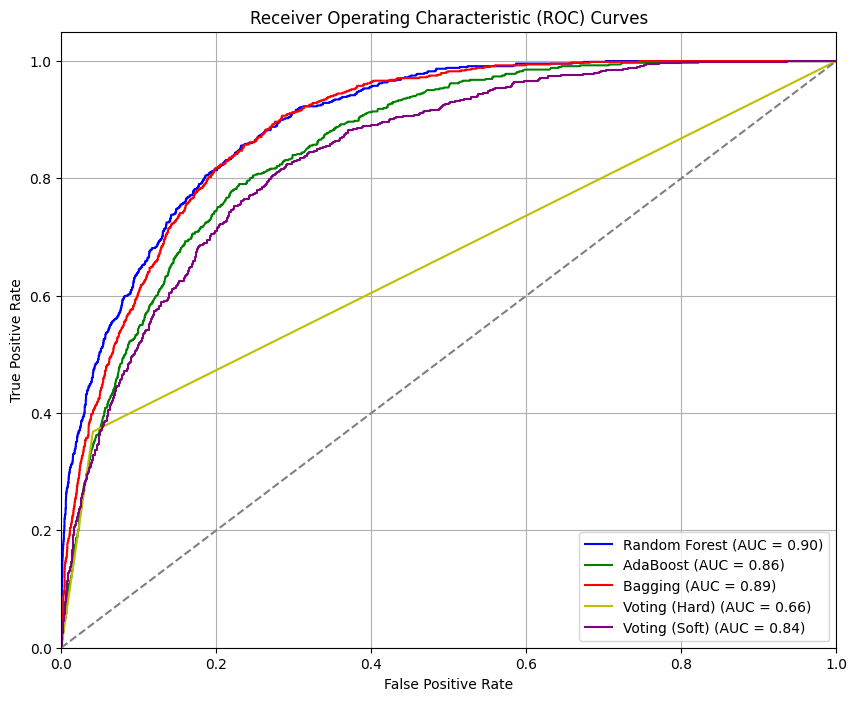

In [40]:
y_prob_rf = best_rf_clf.predict_proba(X_val)[:, 1]
y_prob_ada = ada_model.predict_proba(X_val)[:, 1]
y_prob_bagging = best_bagging_clf.predict_proba(X_val)[:, 1]
y_prob_voting_soft = voting_clf_soft.predict_proba(X_val)[:, 1]

y_pred_voting_hard = voting_clf_hard.predict(X_val)

fpr_rf, tpr_rf, _ = roc_curve(y_val, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_ada, tpr_ada, _ = roc_curve(y_val, y_prob_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

fpr_bagging, tpr_bagging, _ = roc_curve(y_val, y_prob_bagging)
roc_auc_bagging = auc(fpr_bagging, tpr_bagging)

fpr_voting_soft, tpr_voting_soft, _ = roc_curve(y_val, y_prob_voting_soft)
roc_auc_voting_soft = auc(fpr_voting_soft, tpr_voting_soft)
fpr_voting_hard, tpr_voting_hard, _ = roc_curve(y_val, y_pred_voting_hard)
roc_auc_voting_hard = auc(fpr_voting_hard, tpr_voting_hard)

plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='b')
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC = {roc_auc_ada:.2f})', color='g')
plt.plot(fpr_bagging, tpr_bagging, label=f'Bagging (AUC = {roc_auc_bagging:.2f})', color='r')
plt.plot(fpr_voting_hard, tpr_voting_hard, label=f'Voting (Hard) (AUC = {roc_auc_voting_hard:.2f})', color='y')
plt.plot(fpr_voting_soft, tpr_voting_soft, label=f'Voting (Soft) (AUC = {roc_auc_voting_soft:.2f})', color='purple')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Part5: Recommend Model for Business Process
After comparison, we recommend applying the Bagging Classifier model to the business process. The main reason is that the Bagging model performs well in detecting minority customers (customers with deposits: class 1), which has a direct positive impact on the business, especially in terms of marketing strategies as they are the customers which the marketing strategies are targetting at.

If we can better identify customers with deposits (minority customers: class 1), we can develop more precise marketing strategies based on customer characteristics and bring greater profits. For example, by using a model to identify customers who have made deposits but with small amounts, promotional activities can be designed specifically for them.  Such as offering deposit rewards or interest rate discounts to encourage them to convert into long-term customers.

Secondly, Bagging Classifier performs more robustly in terms of accuracy and recall when dealing with imbalanced data. From the ROC curve plotted, Random Forest model appears to have the highest AUC value despite the fact its running time and computational cost can be robust. Although Bagging may not be the best of all data in terms of individual indicators(AUC values), its performance is very balanced when considering all indicators, and it can better adapt to business needs. 

Finally, in terms of runtime, the Bagging model is not the shortest (taking about 1 minute more than AdaBoost which is around 5 minutes), but it is much faster than Random Forest (around 23 minutes). It's important to look at the cost of time and human resource when it comes to business, therefore it came natural that a model with similar performance but a much lower cost of time should be considered. As the result, this relatively short running time of Bagging Classifier can ensure timely decision-making of actions while also providing good predictive results.

Therefore, considering the overall trade-off between performance and operational efficiency, the Bagging model provides a good balance and is suitable for the actual needs of business scenarios.


### Part5: Decision Criteria
#### ①Better performance in handling minority class 1 (customers with deposits)

 From the confusion matrix and calculated matrics, it appears that the Bagging model has a recall score of 79% for class 1 customers, with an F1 score of 51%, which is significantly better than other models. For business objectives, especially when we need to identify customers who would put deposits, a high recall rate means we can capture more potential customers and develop more effective marketing strategies for better business outcomes.

#### ② Good ROC ranking

In terms of performance, the ROC curve of the Bagging model is 0.89, second only to Random Forest's 0.90, far higher than other models (such as Voting Hard's 0.66 and AdaBoost's 0.86). A higher ROC score suggests that the model is more effective at distinguishing between positive and negative classes, even in the presence of imbalanced data, indicating that Bagging achieves better overall performance. 

#### ③Moderate computational cost

Considering the scalability and operational efficiency, it's important to look at the computational cost for this business case. We do observe the best performance metrics and ROC from running a Random Forest model, the running time is close to half an hour just dealing with a datatset with 10,000 rows. It can be hard to scale the model when it comes to larger dataset. 
The running time of the Bagging model is about 5 minutes, which is slightly longer than the Voting Classifier and AdaBoost models, but much shorter than Random Forest's 23-minute running time. The trade-off between the performance and computational cost seems to the most reasonable in Bagging Classifier model, therefore our ultimate model decision is Bagging Classifier. 
